# BIOS512 Assignment #5

📈 For this assignment we will work with inflation data provided by the [US Bureah of Labor Statistics](https://www.bls.gov/cpi/tables/). The data is provided as `excel` files. We have the data for years 2019-2023 in our `assignemnts` folder under the filename `revised-seasonally-adjusted-indexes-2023.xlsx`.

Let's read the data in first. You'll need to load both the `tidyverse` and the `readxl` libraries.

In [1]:
library('tidyverse')
library('readxl')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Now you should have a function in your session called `read_excel`. Pass in the filename from above as a `string` to the `read_excel` function and capture the `tibble` output with a variable called `df_price_index`.  

In [2]:
df_price_index = read_excel('revised-seasonally-adjusted-indexes-2020.xlsx')
df_price_index |> head()

ITEM,TITLE,seriesid,DATA_TYPE,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SA0,All items,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,2016,237.652,237.336,238.080,238.992,239.557,240.222,240.101,240.545,241.176,241.741,242.026,242.637
SA0,All items,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,2017,243.620,243.872,243.766,244.274,244.069,244.218,244.280,245.205,246.551,246.657,247.378,247.736
SA0,All items,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,2018,248.721,249.300,249.517,250.275,250.786,251.152,251.345,251.735,252.183,252.899,252.822,252.493
SA0,All items,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,2019,252.441,252.969,254.147,255.326,255.371,255.423,255.925,256.118,256.532,257.387,257.989,258.203
SA0,All items,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,2020,258.687,258.824,257.989,256.192,255.942,257.282,258.604,259.511,260.149,260.462,260.927,261.560
SA0,All items,CUSR0000SA0,SEASONAL FACTOR,2016,99.690,99.905,100.022,100.113,100.281,100.331,100.219,100.126,100.104,99.995,99.722,99.503


We want to plot the average `SEASONALLY_ADJUSTED_INDEX` for `Energy`, `Food`, `Shelter`, and `Used cars and trucks` per month for over the period covered in the dataset (2019-2023).

Execute this cell. You'll need this months vector for the picot operation below:

In [4]:
months = c('JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC')

Here are the operations you'll need to perform:
- filter for...
  - `TITLE %in% c('Energy', 'Food', 'Shelter', 'Used cars and trucks')`
  - and, `DATA_TYPE == 'SEASONALLY ADJUSTED INDEX'`
- Pivot the columns for the Months so the table is in long-form and each row represents a month (hint: use `cols = months` with `pivot_longer`)
- Create a column for the date with this mutate operation: `mutate(date_str = glue::glue('{YEAR}-{name}-01') |> str_to_lower(), date = as.Date(date_str, format = '%Y-%b-%d'))`
- Group by `date` and `summarize` by taking the mean value for each date group.


The first three rows of your table will look something like this:

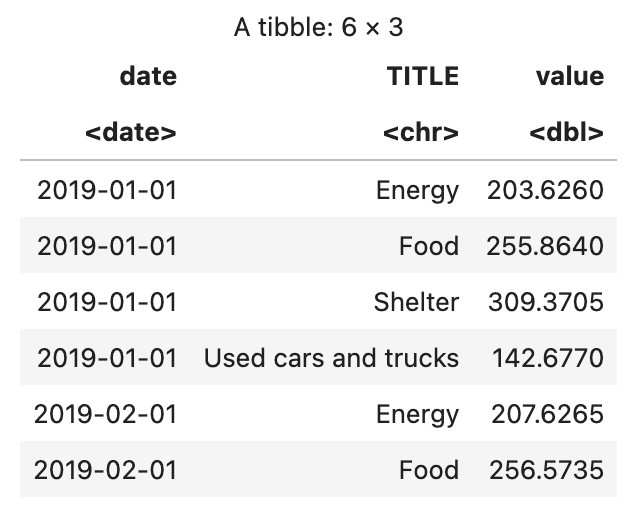

In [27]:
df_clean = df_price_index |>
    filter(TITLE %in% c('Energy', 'Food', 'Shelter', 'Used cars and trucks')) |>
    filter(DATA_TYPE == 'SEASONALLY ADJUSTED INDEX') |>
    pivot_longer(cols = months) |>
    mutate(date_str = glue::glue('{YEAR}-{name}-01') |> str_to_lower(), date = as.Date(date_str, format = '%Y-%b-%d')) |>
    group_by(date, TITLE) |>
    summarize(CPI = mean(value))
df_clean |> head()

`summarise()` has grouped output by 'date'. You can override using the
`.groups` argument.


date,TITLE,CPI
<date>,<chr>,<dbl>
2016-01-01,Energy,184.7020
2016-01-01,Food,247.8650
2016-01-01,Shelter,280.2795
2016-01-01,Used cars and trucks,145.1500
2016-02-01,Energy,175.5255
2016-02-01,Food,248.1270


Ok! Now make this plot:

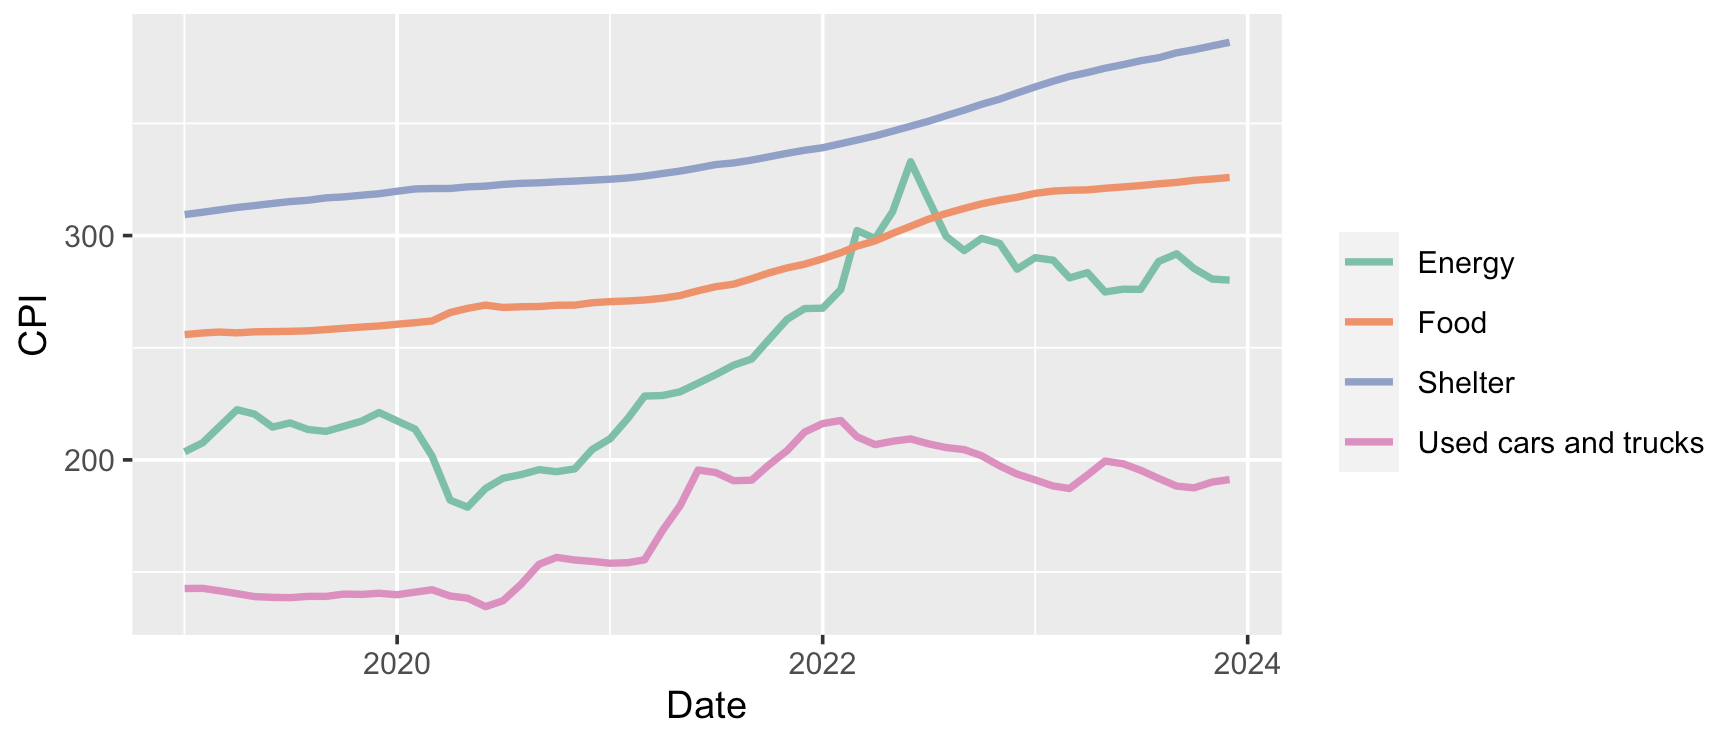

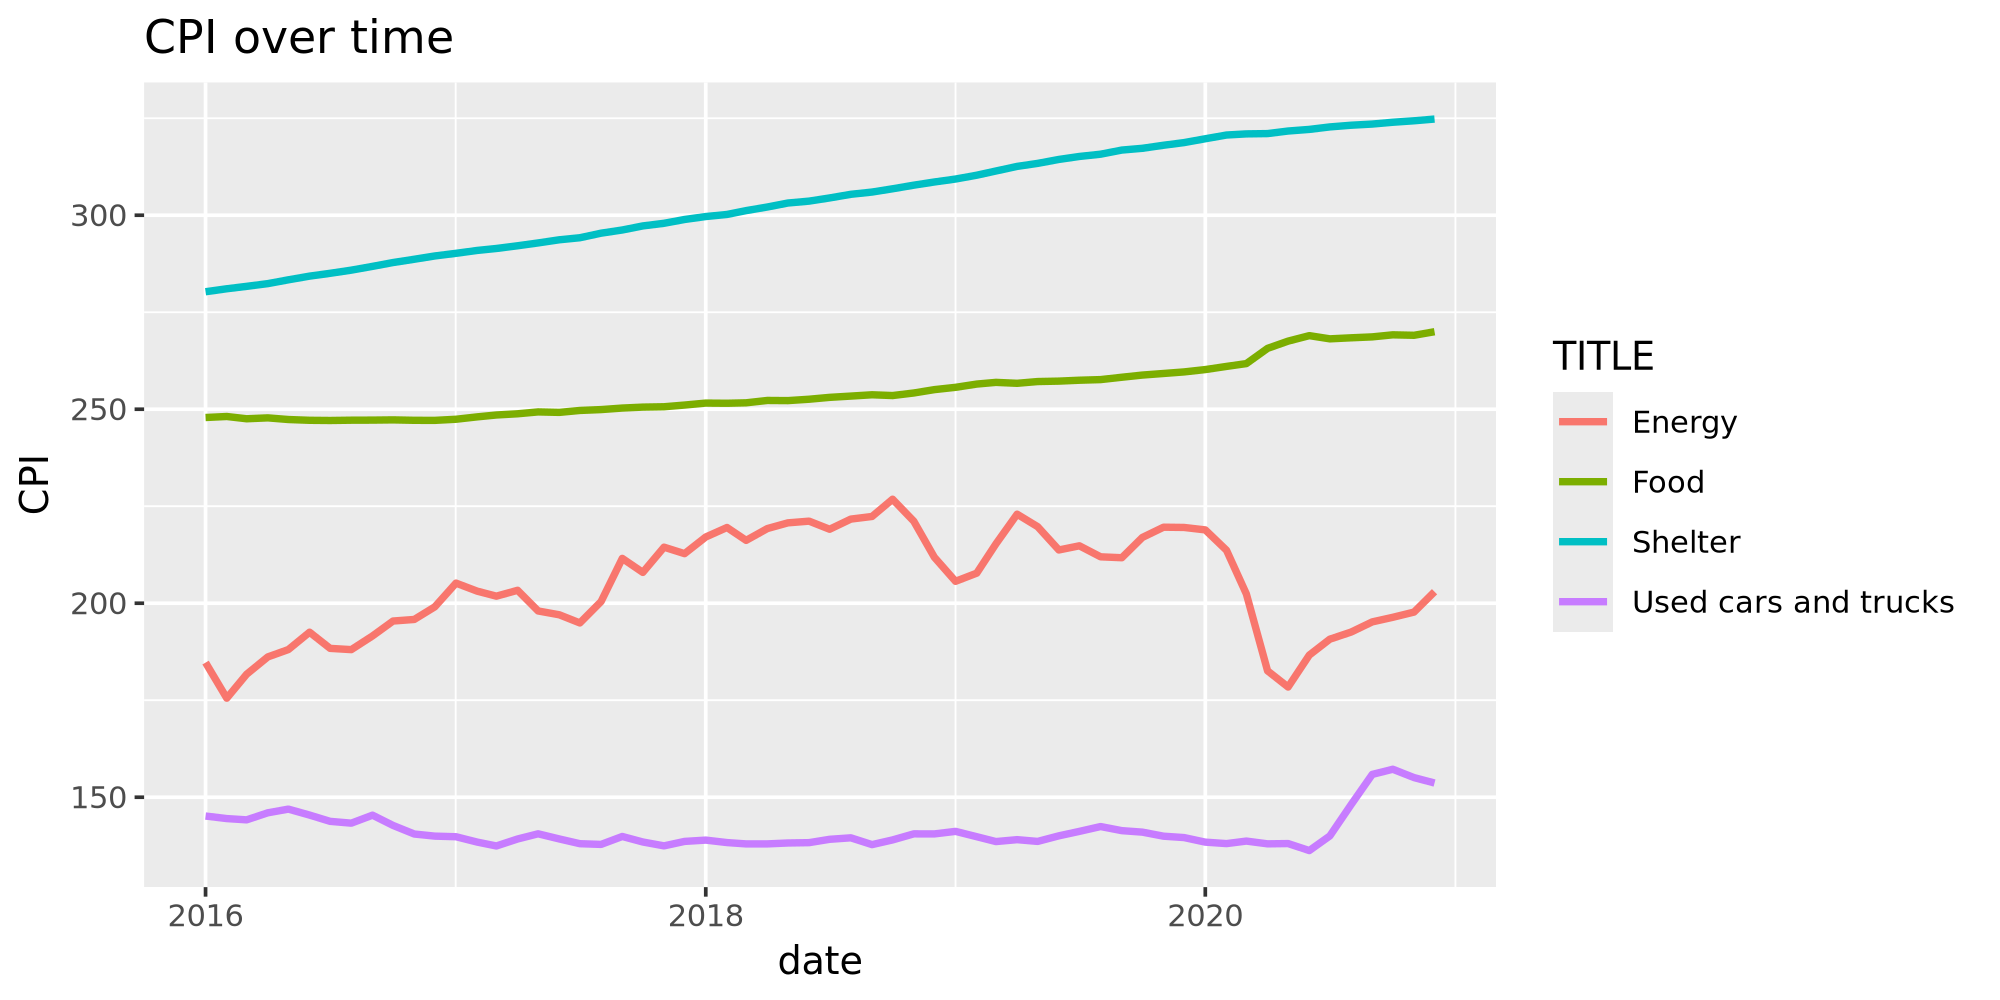

In [43]:
options(repr.plot.width = 8, repr.plot.height = 4)
ggplot(df_clean, aes(x = date, y = CPI, color = TITLE)) +
    geom_line(lwd = 1) +
    labs(title = ('CPI over time'))

This is how the [USBLS defines the index](https://www.bls.gov/cpi/) (if you're curious):

>  The Consumer Price Index (CPI) is a measure of the average change over time in the prices paid by urban consumers for a market basket of consumer goods and services.